# WIND SPEED PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Sreerag\\Data Science\\Internship\\Datasets\\wind_dataset.csv")
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


## EDA & DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day
df = df.drop(['DATE'], axis=1)

In [5]:
df

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5
...,...,...,...,...,...,...,...,...,...,...,...
6569,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,1978,12,27
6570,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,1978,12,28
6571,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,1978,12,29
6572,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,1978,12,30


In [6]:
df.isnull().sum()

WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
YEAR         0
MONTH        0
DAY          0
dtype: int64

<Axes: >

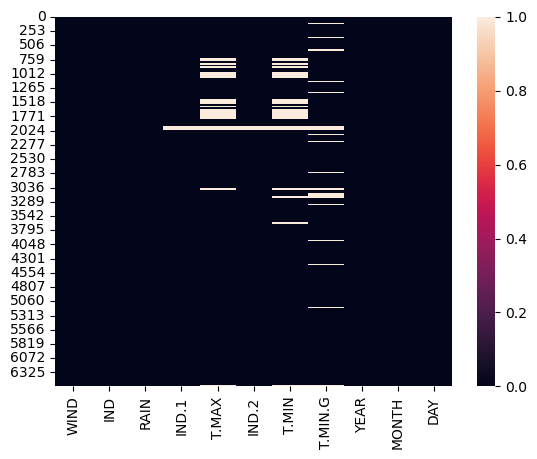

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mode().iloc[0])
df['T.MIN'] = df['T.MIN'].fillna( df['T.MIN'].mode().iloc[0])
df['T.MIN.G'] = df['T.MIN.G'].fillna( df['T.MIN.G'].mode().iloc[0])
df['IND.1']=df['IND.1'].fillna(0)
df['IND.2']=df['IND.2'].fillna(0)

<Axes: >

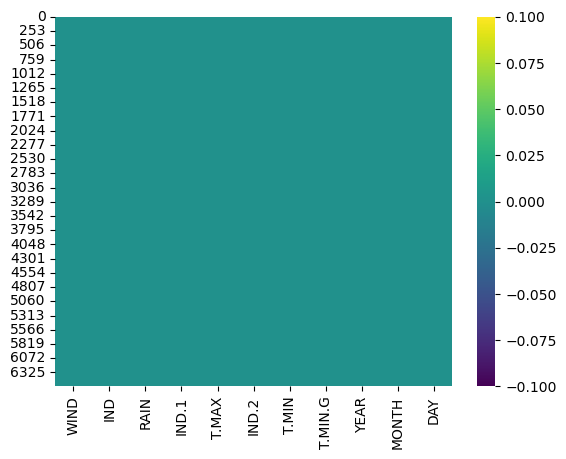

In [9]:
sns.heatmap(df.isnull(),cmap='viridis')

In [10]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
YEAR       0
MONTH      0
DAY        0
dtype: int64

In [11]:
df.corr()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
WIND,1.000000,-0.038578,0.120876,0.070852,-0.237118,0.048453,-0.077121,0.012589,-0.069690,-0.066635,0.000502
IND,-0.038578,1.000000,-0.148535,-0.027644,-0.065131,-0.014566,-0.051882,-0.061415,0.189814,0.017213,-0.001591
RAIN,0.120876,-0.148535,1.000000,0.023092,-0.045650,0.011719,0.013344,0.025569,-0.008446,0.038679,-0.008988
IND.1,0.070852,-0.027644,0.023092,1.000000,-0.196991,0.909817,0.151995,-0.007176,-0.319178,0.031892,-0.000187
T.MAX,-0.237118,-0.065131,-0.045650,-0.196991,1.000000,-0.272449,0.722202,0.623272,0.059954,0.202660,0.005390
IND.2,0.048453,-0.014566,0.011719,0.909817,-0.272449,1.000000,0.028566,-0.122827,-0.289242,0.009218,-0.008388
T.MIN,-0.077121,-0.051882,0.013344,0.151995,0.722202,0.028566,1.000000,0.824797,-0.004184,0.197061,0.009833
T.MIN.G,0.012589,-0.061415,0.025569,-0.007176,0.623272,-0.122827,0.824797,1.000000,-0.068350,0.174994,0.005289
YEAR,-0.069690,0.189814,-0.008446,-0.319178,0.059954,-0.289242,-0.004184,-0.068350,1.000000,-0.000077,0.000088
MONTH,-0.066635,0.017213,0.038679,0.031892,0.202660,0.009218,0.197061,0.174994,-0.000077,1.000000,0.010674


<Axes: >

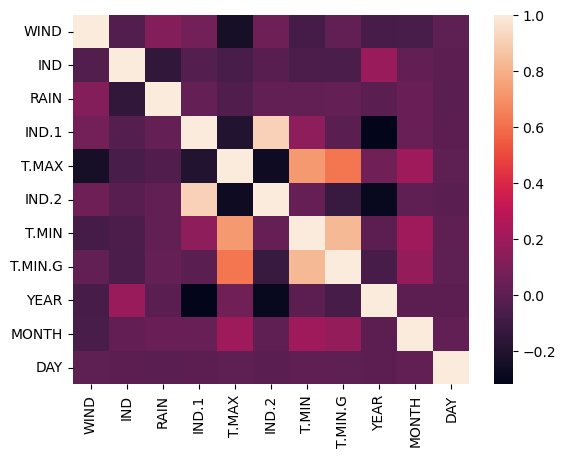

In [12]:
sns.heatmap(df.corr())

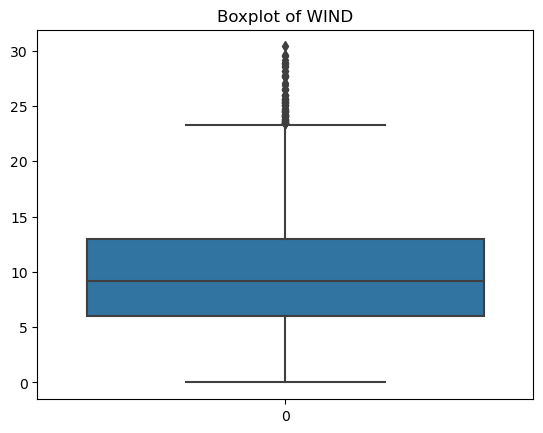

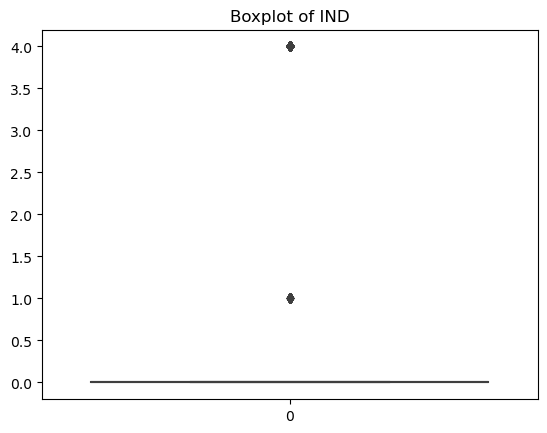

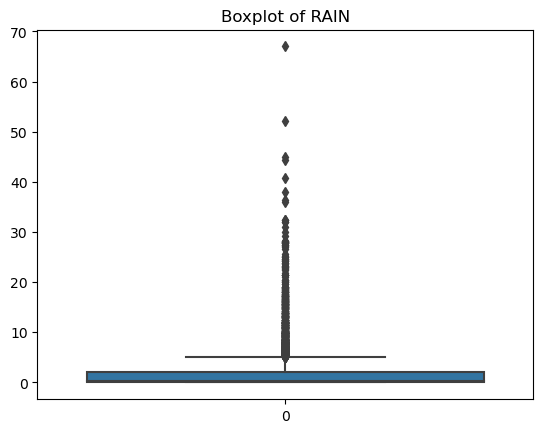

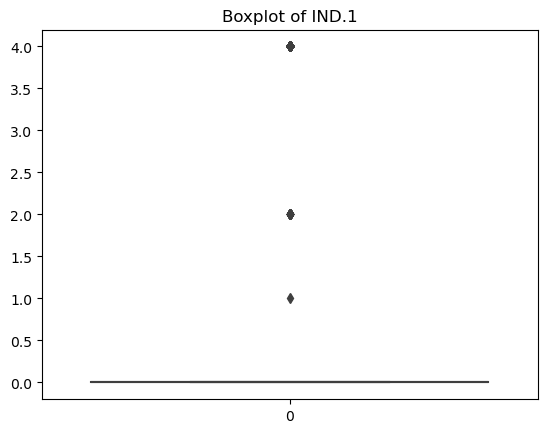

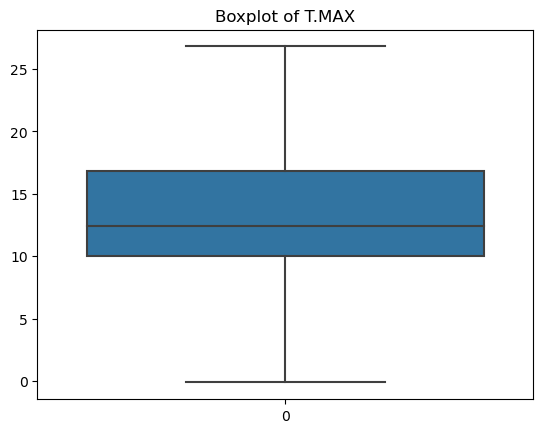

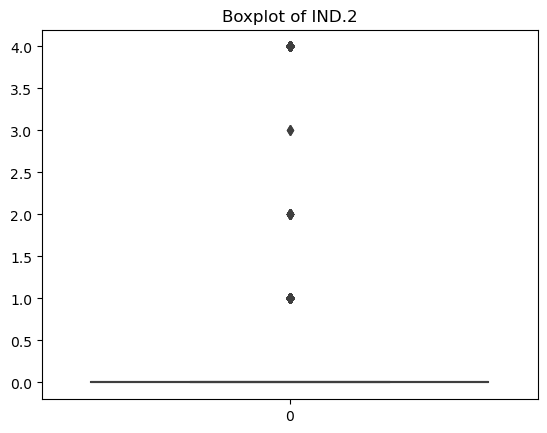

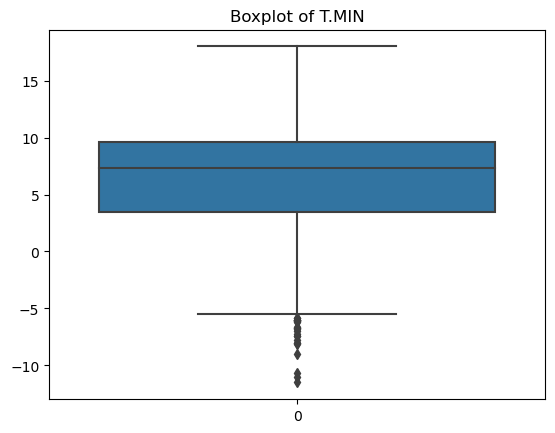

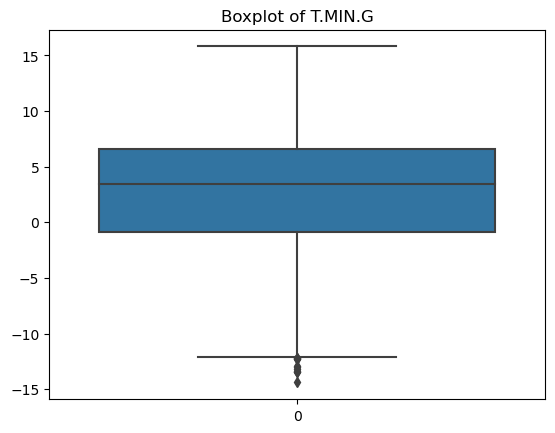

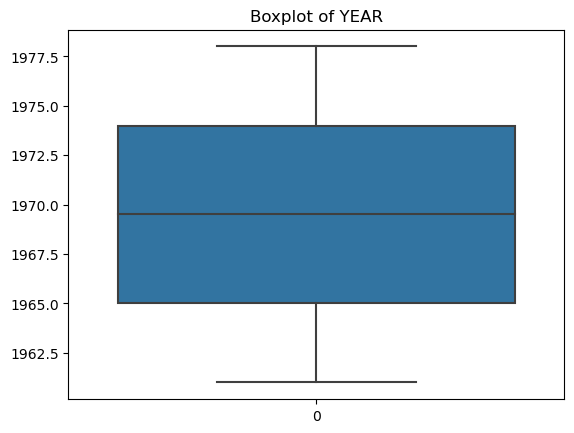

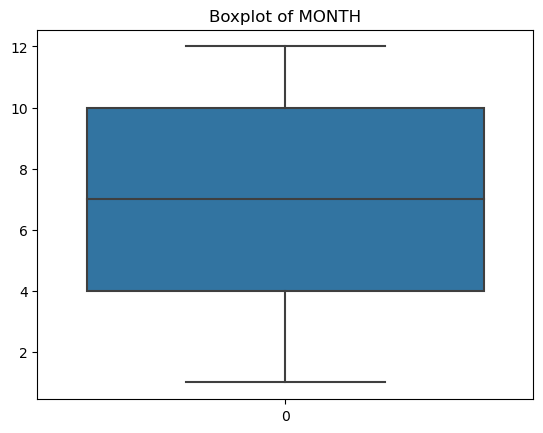

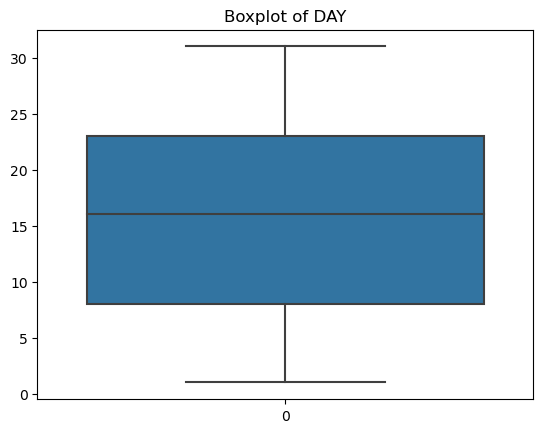

In [13]:
for column in df.columns:
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## MODEL BUILDING

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [15]:
x=df.drop('WIND',axis=1)
y=df['WIND']
print(x)
print(y)

      IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G  YEAR  MONTH  DAY
0       0   0.2    0.0    9.5    0.0    3.7     -1.0  1961      1    1
1       0   5.1    0.0    7.2    0.0    4.2      1.1  1961      1    2
2       0   0.4    0.0    5.5    0.0    0.5     -0.5  1961      1    3
3       0   0.2    0.0    5.6    0.0    0.4     -3.2  1961      1    4
4       0  10.4    0.0    7.2    1.0   -1.5     -7.5  1961      1    5
...   ...   ...    ...    ...    ...    ...      ...   ...    ...  ...
6569    0  16.8    0.0    9.8    0.0    4.0      0.0  1978     12   27
6570    0  16.0    0.0    9.1    0.0    8.5      8.0  1978     12   28
6571    0  14.7    0.0    5.0    0.0    3.5      3.2  1978     12   29
6572    0   4.9    0.0    2.9    0.0    0.3     -0.5  1978     12   30
6573    0   0.5    0.0    1.2    1.0   -1.5     -3.0  1978     12   31

[6574 rows x 10 columns]
0       13.67
1       11.50
2       11.25
3        8.63
4       11.92
        ...  
6569    14.46
6570    14.33
6571    19

In [16]:
df['IND'].unique()

array([0, 1, 4], dtype=int64)

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(5259, 10)
(5259,)
(1315, 10)
(1315,)


## HYPER PARAMETER TUNING

In [18]:
# regressor=RandomForestRegressor()

In [19]:
# param_grid = {
#     'n_estimators': [100, 150,200,250],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 6],
#     'min_samples_leaf': [2, 4, 6]
# }

In [20]:
# grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(xtrain,ytrain)

In [21]:
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

In [22]:
best_regressor=RandomForestRegressor(n_estimators=250,max_depth=None,min_samples_split=2,min_samples_leaf=2)
best_regressor.fit(xtrain,ytrain)

RandomForestRegressor(min_samples_leaf=2, n_estimators=250)

In [23]:
pred=best_regressor.predict(xtest)
pred

array([ 9.17188633, 12.65546322,  8.5727494 , ..., 12.99868208,
        8.39607614,  7.50510176])

## EVALUATION

In [24]:
print('MAE:', metrics.mean_absolute_error(ytest,pred))
print('MSE:', metrics.mean_squared_error(ytest,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest,pred)))
print('R2:',metrics.r2_score(ytest,pred))

MAE: 3.42875537558293
MSE: 18.66208102385959
RMSE: 4.319963081307477
R2: 0.2557117349267395


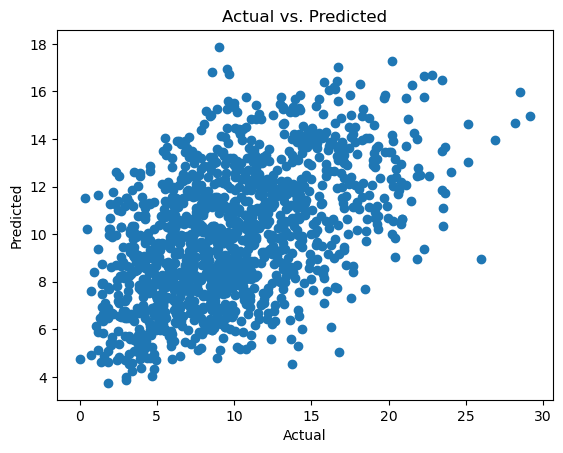

In [25]:
plt.scatter(ytest,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

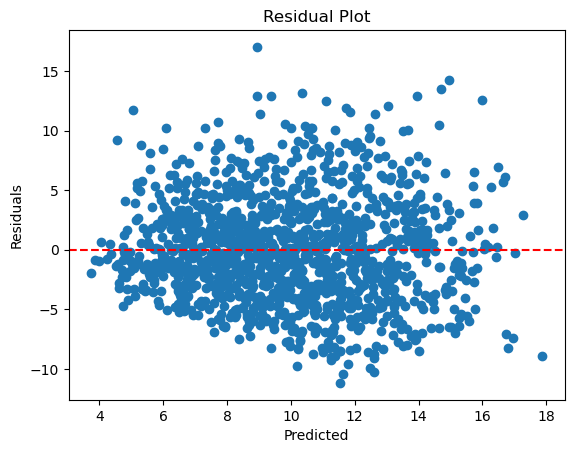

In [26]:
residuals = ytest - pred
plt.scatter(pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

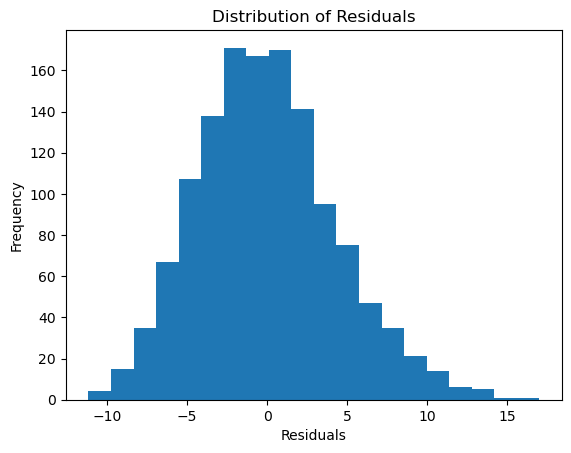

In [27]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [28]:
import pickle as pkl
pkl.dump(best_regressor,open('model.pkl','wb'))